# **MATEMATIKA DISKRIT**
**Penugasan 04**
Pada codescript ini dilakukan eksperimen simulasi pola makan dengan pendekatan Matematika Diskrit menggunakan Python. Data makanan awal dibaca dari file CSV lalu diperkaya dengan tambahan menu baru yang memiliki atribut harga, rasa, sehat, kenyang, dan bosan. Simulasi dilakukan sebanyak 500 kali, masing-masing menggambarkan konsumsi makanan pagi dan malam selama 31 hari dengan total anggaran Rp1.000.000.

Setiap pilihan makanan memengaruhi skor total, skor kesehatan, dan sisa anggaran. Dari hasil simulasi diperoleh ratusan pola makan sehat, dengan beberapa pola menonjol yang seimbang antara gizi, variasi rasa, serta efisiensi biaya. Analisis lebih lanjut juga memperlihatkan makanan favorit yang sering muncul, serta hubungan antara kesehatan dan pengeluaran. Visualisasi berupa histogram, scatter plot, hingga grafik 3D digunakan untuk memperjelas distribusi kesehatan dan performa pola makan.

## **Set-Up Awal dan Data Preparation**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving makanan.csv to makanan (1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

NPM = 19102
np.random.seed(NPM)

''' Membaca Data Makanan '''
makan_initial = pd.read_csv("makanan_updated.csv", sep=';')

''' ===== TAMBAHAN: Data makanan yang lebih beragam ===== '''
makanan_tambahan = [
    {'makanan': 'Sate Ayam', 'harga': 25000, 'kenyang': 0.8, 'rasa': 0.9, 'sehat': 0.6, 'bosan': 0.3},
    {'makanan': 'Gado-gado', 'harga': 15000, 'kenyang': 0.7, 'rasa': 0.8, 'sehat': 0.9, 'bosan': 0.2},
    {'makanan': 'Bubur Ayam', 'harga': 12000, 'kenyang': 0.6, 'rasa': 0.7, 'sehat': 0.7, 'bosan': 0.4},
    {'makanan': 'Pecel Lele', 'harga': 18000, 'kenyang': 0.9, 'rasa': 0.8, 'sehat': 0.5, 'bosan': 0.3},
    {'makanan': 'Tahu Telur', 'harga': 14000, 'kenyang': 0.7, 'rasa': 0.8, 'sehat': 0.8, 'bosan': 0.2},
    {'makanan': 'Soto Betawi', 'harga': 22000, 'kenyang': 0.8, 'rasa': 0.9, 'sehat': 0.6, 'bosan': 0.3},
    {'makanan': 'Ketoprak', 'harga': 13000, 'kenyang': 0.6, 'rasa': 0.8, 'sehat': 0.7, 'bosan': 0.4},
    {'makanan': 'Rawon', 'harga': 24000, 'kenyang': 0.9, 'rasa': 0.9, 'sehat': 0.5, 'bosan': 0.3}
]

''' Menambahkan Makanan Baru ke DataFrame '''
makan_tambahan_df = pd.DataFrame(makanan_tambahan)

''' Memastikan Kolom Konsisten '''
makan_initial.columns = ['makanan', 'kenyang', 'sehat', 'rasa', 'bosan', 'harga']
makan = pd.concat([makan_initial, makan_tambahan_df], ignore_index=True)

> Kode membaca data makanan file CSV, lalu menambahkan daftar makanan baru dengan atribut sesuai. Data tambahan digabungkan ke dalam DataFrame agar lebih beragam dan konsisten, untuk analisis selanjutnya.

## **Parameter Simulasi dan Inisialisasi**

In [3]:
budget = 1e6
wkenyang_base = 0.8
wrasa_base = 0.7
wsehat_base = 0.9
wbosan_base = 0.2

'''SAMPLE '''
SAMPLE_NUM = 500
sampleid = np.arange(0, 500)
skor = np.zeros(SAMPLE_NUM, dtype=np.double)
sisa = np.zeros(SAMPLE_NUM, dtype=np.double)
sehat = np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM = 150e3
SISA_MAKSIMUM = 300e3
bin_sisa = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=np.double)  # 31 hari × 2 = 62

> Bagian kode ini menetapkan anggaran (budget) serta bobot dasar untuk kriteria data. Dibuat 500 sampel simulasi dengan berbagai variabel. Rentang sisa anggaran juga didefinisikan dalam bentuk bin, sementara array respons disiapkan untuk menyimpan hasil simulasi pemilihan makanan selama periode 31 hari.

## **Simulasi Pola Makan**

In [4]:
for n in range(0, SAMPLE_NUM):
    budget_local = 1e6
    skor_kumulatif = 0
    skor_sehat = 0
    pilihan_hari = []

    for i in range(0, 31):  # hari
        # Makan Pagi
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base, scale=0.2)

        skor_kumulatif += (w_kenyang * makan['kenyang'][pilihan] +
                          w_rasa * makan['rasa'][pilihan] +
                          w_sehat * makan['sehat'][pilihan] -
                          w_bosan * makan['bosan'][pilihan])
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget_local -= makan['harga'][pilihan]
        resp_pilih[n][2*i] = pilihan
        pilihan_hari.append(pilihan)

        # Makan Malam
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base*2, scale=0.2)

        skor_kumulatif += (w_kenyang * makan['kenyang'][pilihan] +
                          w_rasa * makan['rasa'][pilihan] +
                          w_sehat * makan['sehat'][pilihan] -
                          w_bosan * makan['bosan'][pilihan])
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget_local -= makan['harga'][pilihan]
        resp_pilih[n][2*i+1] = pilihan
        pilihan_hari.append(pilihan)

    sisa[n] = budget_local
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    if SISA_MININUM <= budget_local < SISA_MAKSIMUM:
        ''' Mengecek Index '''
        bin_index = int((budget_local - SISA_MININUM) / 1000)
        if 0 <= bin_index < len(bin_sisa):
            resp_sehat[n][bin_index] = skor_sehat

> Sementara itu, kode ini melakukan simulasi 500 skenario konsumsi makanan selama 31 hari. Dalam setiap hari, individu diasumsikan makan pagi dan malam dengan pilihan acak dari daftar makanan yang tersedia.

> Bobot untuk kenyang, rasa, sehat, dan bosan diberikan variasi acak agar lebih realistis. Setiap pilihan memengaruhi skor kepuasan, skor kesehatan, serta pengurangan anggaran harian. Hasil akhir dari setiap simulasi mencatat total skor, kesehatan, sisa anggaran, serta distribusi kesehatan berdasarkan rentang sisa uang.

## **Analisis Hasil**

In [5]:
''' ===== SOLUSI TUGAS ===== '''

print("=" * 60)
print("ANALISIS POLA MAKAN OPTIMAL")
print("=" * 60)

# (1) Mencari Pola Makan dengan Nilai Kesehatan Positif
indeks_sehat_positif = np.where(sehat > 0)[0]
print(f"\n(1) Ditemukan {len(indeks_sehat_positif)} pola makan dengan nilai kesehatan positif")

# (2) Titik dengan Sisa Uang Positif dari Pola Makan Sehat
indeks_sehat_dan_uang = indeks_sehat_positif[sisa[indeks_sehat_positif] > 0]
print(f"(2) {len(indeks_sehat_dan_uang)} pola makan sehat dengan sisa uang positif")

# (3) Pola Makan dengan Skor Tertinggi yang Sehat
if len(indeks_sehat_positif) > 0:
    indeks_terbaik = indeks_sehat_positif[np.argmax(skor[indeks_sehat_positif])]
    print(f"(3) Pola makan terbaik - Sample #{indeks_terbaik}")
    print(f"    Skor total: {skor[indeks_terbaik]:.2f}")
    print(f"    Skor kesehatan: {sehat[indeks_terbaik]:.2f}")
    print(f"    Sisa uang: Rp {sisa[indeks_terbaik]:,.0f}")

    # (4) Menampilkan Jadwal Makanan Pola Terbaik
    print(f"\n(4) JADWAL MAKANAN POLA TERBAIK (Sample #{indeks_terbaik})")
    print("-" * 50)

    total_pengeluaran = 0
    frekuensi_makanan = Counter()

    for hari in range(31):
        idx_pagi = int(resp_pilih[indeks_terbaik][2*hari])
        idx_malam = int(resp_pilih[indeks_terbaik][2*hari+1])

        ''' Memastikan Indeks Berada dalam Batas DataFrame '''
        if 0 <= idx_pagi < len(makan) and 0 <= idx_malam < len(makan):
            makanan_pagi = makan['makanan'][idx_pagi]
            makanan_malam = makan['makanan'][idx_malam]
            harga_pagi = makan['harga'][idx_pagi]
            harga_malam = makan['harga'][idx_malam]

            frekuensi_makanan[makanan_pagi] += 1
            frekuensi_makanan[makanan_malam] += 1
            total_pengeluaran += harga_pagi + harga_malam

            print(f"Hari {hari+1:2d}: {makanan_pagi:15} (Rp{harga_pagi:6,}) | {makanan_malam:15} (Rp{harga_malam:6,})")
        else:
            print(f"Hari {hari+1:2d}: Invalid food index encountered. Skipping.")


    print("-" * 50)
    print(f"Total pengeluaran: Rp {total_pengeluaran:,.0f}")
    print(f"Sisa budget: Rp {sisa[indeks_terbaik]:,.0f}")

    # Analisis Frekuensi Makanan
    print(f"\nANALISIS FREKUENSI MAKANAN:")
    for makanan, freq in frekuensi_makanan.most_common(10):
        print(f"  {makanan:15}: {freq:2d} kali")

else:
    print("Tidak ditemukan pola makan dengan nilai kesehatan positif")

ANALISIS POLA MAKAN OPTIMAL

(1) Ditemukan 466 pola makan dengan nilai kesehatan positif
(2) 455 pola makan sehat dengan sisa uang positif
(3) Pola makan terbaik - Sample #101
    Skor total: 109.80
    Skor kesehatan: 6.30
    Sisa uang: Rp 53,000

(4) JADWAL MAKANAN POLA TERBAIK (Sample #101)
--------------------------------------------------
Hari  1: nasigoreng      (Rp14,000.0) | Soto Betawi     (Rp22,000.0)
Hari  2: nasipadang      (Rp17,000.0) | Tahu Telur      (Rp14,000.0)
Hari  3: Rawon           (Rp24,000.0) | gorengan        (Rp10,000.0)
Hari  4: cireng          (Rp10,000.0) | mi instan       (Rp6,000.0)
Hari  5: Sate Ayam       (Rp25,000.0) | capcay          (Rp15,000.0)
Hari  6: Rawon           (Rp24,000.0) | Sate Ayam       (Rp25,000.0)
Hari  7: cireng          (Rp10,000.0) | warteg          (Rp18,000.0)
Hari  8: mieayam         (Rp10,000.0) | cireng          (Rp10,000.0)
Hari  9: bakso           (Rp10,000.0) | Soto Betawi     (Rp22,000.0)
Hari 10: Rawon           (Rp24,00

>**Analisis Output Pola Makanan Optimal**

>Dari total 500 pola makan yang disimulasikan, ditemukan bahwa sebanyak 466 pola menghasilkan nilai kesehatan positif. Hal ini menunjukkan bahwa sebagian besar kombinasi makanan yang dipilih cenderung cukup menyehatkan. Dari jumlah tersebut, 455 pola masih menyisakan uang positif pada akhir periode, artinya sebagian besar skenario tetap mampu menjaga keseimbangan antara aspek kesehatan dan pengeluaran.

>Dari semua pola tersebut, diperoleh satu pola makan terbaik pada sampel ke-101 dengan skor total 109,80, skor kesehatan 6,30, dan sisa anggaran Rp 53.000 dari budget awal Rp 1.000.000. Pola ini relatif optimal karena tetap menghasilkan skor kesehatan positif yang cukup tinggi, sambil menjaga sisa anggaran agar tidak habis seluruhnya.

>Jika ditinjau, pola ini memperlihatkan variasi makanan cukup beragam, meskipun ada kecenderungan munculnya makanan tertentu lebih sering. Dari analisis frekuensi, terlihat bahwa Tahu Telur dan Capcay menjadi makanan yang paling banyak dipilih (masing-masing 7 kali), diikuti oleh Soto Betawi dan Nasi Padang (masing-masing 5 kali). Makanan-makanan tersebut memiliki kombinasi yang relatif seimbang antara harga, rasa, serta nilai kesehatan, sehingga wajar jika algoritma simulasi sering “jatuh” pada pilihan ini.

>Total pengeluaran dari pola terbaik ini adalah Rp 947.000, dengan sisa anggaran Rp 53.000. Hal ini menunjukkan bahwa walaupun sebagian besar budget sudah terpakai, pola makan yang dihasilkan masih cukup sehat dan bervariasi. Dengan kata lain, pola konsumsi ini berhasil memaksimalkan aspek kepuasan dan kesehatan dalam batas finansial yang tersedia.

In [6]:
''' ===== DETAIL ANALYSIS Tugas 01: SEMUA 466 POLA MAKAN SEHAT ===== '''

print("=" * 70)
print("DETAIL 466 POLA MAKAN DENGAN NILAI KESEHATAN POSITIF")
print("=" * 70)

# Dapatkan Semua Indeks Pola Makan Sehat
indeks_sehat_positif = np.where(sehat > 0)[0]

print(f"Total pola makan sehat: {len(indeks_sehat_positif)}")
print("\n" + "="*50)
print("RINGKASAN 10 POLA MAKAN TERBAIK:")
print("="*50)

# Pola Summary
summary_pola = []

for idx in indeks_sehat_positif:
    summary_pola.append({
        'sample_id': idx,
        'skor_total': skor[idx],
        'skor_sehat': sehat[idx],
        'sisa_uang': sisa[idx],
        'pengeluaran': 1e6 - sisa[idx]
    })

# Urutan Skor Total Tertinggi
summary_pola.sort(key=lambda x: x['skor_total'], reverse=True)

# Tampilkan 10 Terbaik
print(f"{'No':3} {'SampleID':8} {'Skor Total':12} {'Skor Sehat':12} {'Sisa Uang':12} {'Pengeluaran':12}")
print("-" * 70)
for i, pola in enumerate(summary_pola[:10]):
    print(f"{i+1:2}  {pola['sample_id']:7}   {pola['skor_total']:10.2f}   {pola['skor_sehat']:10.2f}   "
          f"Rp{pola['sisa_uang']:8,.0f}   Rp{pola['pengeluaran']:8,.0f}")

print("\n" + "="*50)
print("ANALISIS MAKANAN FAVORIT DARI POLA SEHAT:")
print("="*50)

# Analisis Makanan yang Paling Sering Muncul di Pola Sehat
makanan_favorit_sehat = Counter()

for idx in indeks_sehat_positif:
    for pilihan in resp_pilih[idx]:
        makanan_idx = int(pilihan)
        makanan_favorit_sehat[makanan_idx] += 1

print(f"{'Rank':4} {'Makanan':20} {'Frekuensi':10} {'% Pola Sehat':12}")
print("-" * 50)
for rank, (makanan_idx, freq) in enumerate(makanan_favorit_sehat.most_common(15)):
    persentase = (freq / (len(indeks_sehat_positif) * 62)) * 100  # 62 makan per pola
    nama_makanan = makan['makanan'][makanan_idx]
    harga = makan['harga'][makanan_idx]
    nilai_sehat = makan['sehat'][makanan_idx]

    print(f"{rank+1:3}  {nama_makanan:20} {freq:8} kali {persentase:8.1f}%")
    print(f"       (Harga: Rp{harga:6,}, Sehat: {nilai_sehat:.2f})")

DETAIL 466 POLA MAKAN DENGAN NILAI KESEHATAN POSITIF
Total pola makan sehat: 466

RINGKASAN 10 POLA MAKAN TERBAIK:
No  SampleID Skor Total   Skor Sehat   Sisa Uang    Pengeluaran 
----------------------------------------------------------------------
 1      101       109.80         6.30   Rp  53,000   Rp 947,000
 2      227       109.54         8.40   Rp  49,000   Rp 951,000
 3      181       109.46         5.20   Rp   4,000   Rp 996,000
 4      340       108.73         7.90   Rp  61,000   Rp 939,000
 5      376       108.31         7.00   Rp  54,000   Rp 946,000
 6      357       107.40         6.90   Rp -26,000   Rp1,026,000
 7      433       107.01         5.10   Rp  75,000   Rp 925,000
 8      211       106.07         6.00   Rp -22,000   Rp1,022,000
 9      375       105.92         5.00   Rp  54,000   Rp 946,000
10      158       105.90         6.50   Rp  84,000   Rp 916,000

ANALISIS MAKANAN FAVORIT DARI POLA SEHAT:
Rank Makanan              Frekuensi  % Pola Sehat
--------------

> **Analisis Detail Pola Makan Sehat ((Soal 01))**

>Jika dirangkum ke dalam 10 pola terbaik berdasarkan skor total, terlihat bahwa skor tertinggi dicapai oleh Sample #101 dengan skor 109,80, skor kesehatan 6,30, dan sisa uang Rp53.000. Pola-pola lain seperti Sample #227 dan Sample #340 juga mendekati optimal, bahkan ada yang memiliki skor kesehatan lebih tinggi (misalnya 8,40 pada Sample #227).

>Namun, tidak semua pola unggulan berhasil menjaga keuangan tetap positif. Beberapa kasus seperti Sample #357 dan #211 menunjukkan pengeluaran yang melebihi budget (defisit Rp26.000 dan Rp22.000), menandakan bahwa kesehatan yang baik tidak selalu sejalan dengan pengelolaan anggaran yang disiplin. Dengan demikian, terjadi trade-off nyata antara skor kesehatan dan stabilitas finansial.

>Selain ringkasan pola, analisis juga dilakukan terhadap makanan favorit yang paling sering muncul di pola sehat. Hasilnya cukup menarik: makanan yang paling sering terpilih adalah Gado-gado (1.459 kali, ~5% dari semua pilihan sehat), diikuti oleh gorengan, Sate Ayam, dan Capcay. Kehadiran gado-gado dan capcay cukup masuk akal karena keduanya memiliki nilai kesehatan tinggi (0,9) dengan harga yang masih terjangkau (Rp15.000). Sementara itu, gorengan cukup mengejutkan karena nilai sehatnya rendah (0,2), namun tetap sering muncul karena harga murah (Rp10.000) dan mungkin “tertutupi” oleh makanan lain yang lebih sehat dalam kombinasi pola.

>Dari segi keseimbangan harga dan nilai gizi, makanan seperti Tahu Telur (Rp14.000, sehat 0,8), Warteg (Rp18.000, sehat 0,8), dan Nasi Padang (Rp17.000, sehat 0,8) juga cukup dominan. Hal ini menunjukkan bahwa simulasi secara alami cenderung memilih makanan dengan nilai kesehatan menengah ke atas dan harga moderat, bukan hanya makanan termurah atau terenak semata.

>Secara keseluruhan, analisis ini memperlihatkan bahwa terdapat banyak pola makan sehat yang dapat dicapai dalam batas anggaran Rp1.000.000 per bulan. Namun, untuk mencapai pola optimal dibutuhkan keseimbangan: mengombinasikan makanan sehat seperti gado-gado, capcay, dan tahu telur dengan makanan lebih murah seperti bubur ayam atau mie ayam, tanpa terlalu sering jatuh pada makanan rendah gizi seperti gorengan. Dengan strategi seperti itu, seseorang dapat menjaga kesehatan, tetap menikmati variasi rasa, sekaligus menghindari defisit finansial.


In [7]:
''' ===== DETAIL TUGAS 02 POLA MAKAN TERTENTU ===== '''

def analisis_pola_makan(sample_id):
    """Analisis detail satu pola makan"""
    print(f"\n{'='*60}")
    print(f"DETAIL POLA MAKAN SAMPLE #{sample_id}")
    print(f"{'='*60}")

    print(f"Skor Total    : {skor[sample_id]:.2f}")
    print(f"Skor Kesehatan: {sehat[sample_id]:.2f}")
    print(f"Sisa Uang     : Rp {sisa[sample_id]:,.0f}")
    print(f"Pengeluaran   : Rp {1e6 - sisa[sample_id]:,.0f}")

    # Analisis Makanan dalam Pola Ini
    makanan_pola = Counter()
    total_harga = 0

    for i in range(62):  # 31 hari × 2 makan
        makanan_idx = int(resp_pilih[sample_id][i])
        nama_makanan = makan['makanan'][makanan_idx]
        harga = makan['harga'][makanan_idx]
        makanan_pola[nama_makanan] += 1
        total_harga += harga

    print(f"\nRINGKASAN MAKANAN:")
    print(f"{'Makanan':20} {'Frekuensi':10} {'Total Biaya':12}")
    print("-" * 50)
    for makanan, freq in makanan_pola.most_common():
        harga_satuan = makan['harga'][makan['makanan'] == makanan].values[0]
        total_biaya = harga_satuan * freq
        print(f"{makanan:20} {freq:8} kali Rp{total_biaya:8,.0f}")

    return makanan_pola

# 3 Pola Makan Terbaik
print("\n" + "="*70)
print("CONTOH DETAIL 3 POLA MAKAN TERBAIK:")
print("="*70)

for i in range(3):
    analisis_pola_makan(summary_pola[i]['sample_id'])


CONTOH DETAIL 3 POLA MAKAN TERBAIK:

DETAIL POLA MAKAN SAMPLE #101
Skor Total    : 109.80
Skor Kesehatan: 6.30
Sisa Uang     : Rp 53,000
Pengeluaran   : Rp 947,000

RINGKASAN MAKANAN:
Makanan              Frekuensi  Total Biaya 
--------------------------------------------------
Tahu Telur                  7 kali Rp  98,000
capcay                      7 kali Rp 105,000
Soto Betawi                 5 kali Rp 110,000
nasipadang                  5 kali Rp  85,000
cireng                      5 kali Rp  50,000
Rawon                       4 kali Rp  96,000
ayamgeprek                  4 kali Rp  60,000
gorengan                    3 kali Rp  30,000
Sate Ayam                   3 kali Rp  75,000
mieayam                     3 kali Rp  30,000
nasigoreng                  2 kali Rp  28,000
mi instan                   2 kali Rp  12,000
bakso                       2 kali Rp  20,000
Gado-gado                   2 kali Rp  30,000
Bubur Ayam                  2 kali Rp  24,000
seblak                      2

> **Analisis Tiga Pola Makan Terbaik**
Hasil simulasi memperlihatkan tiga pola makan dengan skor tertinggi, masing-masing memiliki karakteristik berbeda terkait komposisi makanan, skor kesehatan, serta pengelolaan anggaran.

* Sample #101 menempati peringkat pertama dengan skor total 109,80 dan skor kesehatan 6,30. Sisa anggarannya masih positif sebesar Rp53.000. Pola cukup seimbang karena mengombinasikan makanan sehat seperti tahu telur (7 kali), capcay (7 kali), serta gado-gado dengan pilihan lain yang lebih bervariasi. Menariknya, makanan murah dan rendah gizi seperti gorengan serta cireng tetap muncul, namun porsinya relatif kecil sehingga tidak terlalu mengurangi nilai kesehatan. Pola ini bisa dibilang seimbang secara nutrisi dan hemat biaya.

* Sample #227 berada di posisi kedua dengan skor total 109,54, namun memiliki skor kesehatan lebih tinggi yaitu 8,40. Sisa anggaran hampir sama, Rp49.000. Dominasi makanan sehat terlihat jelas, misalnya tahu telur (10 kali), warteg (6 kali), serta sayuran seperti capcay dan gado-gado. Variasi makanan cukup luas, meskipun tetap ada ruang untuk makanan cepat dan murah seperti mie instan serta cireng. Pola ini menunjukkan bahwa kesehatan optimal masih dapat tercapai tanpa mengorbankan finansial secara signifikan.

* Sample #181 menempati posisi ketiga dengan skor total 109,46, namun skor kesehatannya lebih rendah, hanya 5,20. Pengeluaran hampir habis, tersisa hanya Rp4.000 dari Rp1.000.000. Pola makan ini lebih banyak didominasi makanan berat seperti rawon (7 kali), nasi padang (6 kali), dan ayam geprek (6 kali). Walaupun beberapa makanan sehat seperti gado-gado dan tahu telur tetap hadir, porsinya kalah dibandingkan makanan berlemak atau bersantan. Pola ini menunjukkan kecenderungan mengutamakan rasa dan kenyang, namun dengan kompromi terhadap kesehatan dan anggaran.

## **Visualisasi Hasil dan Analisis Lanjutan**

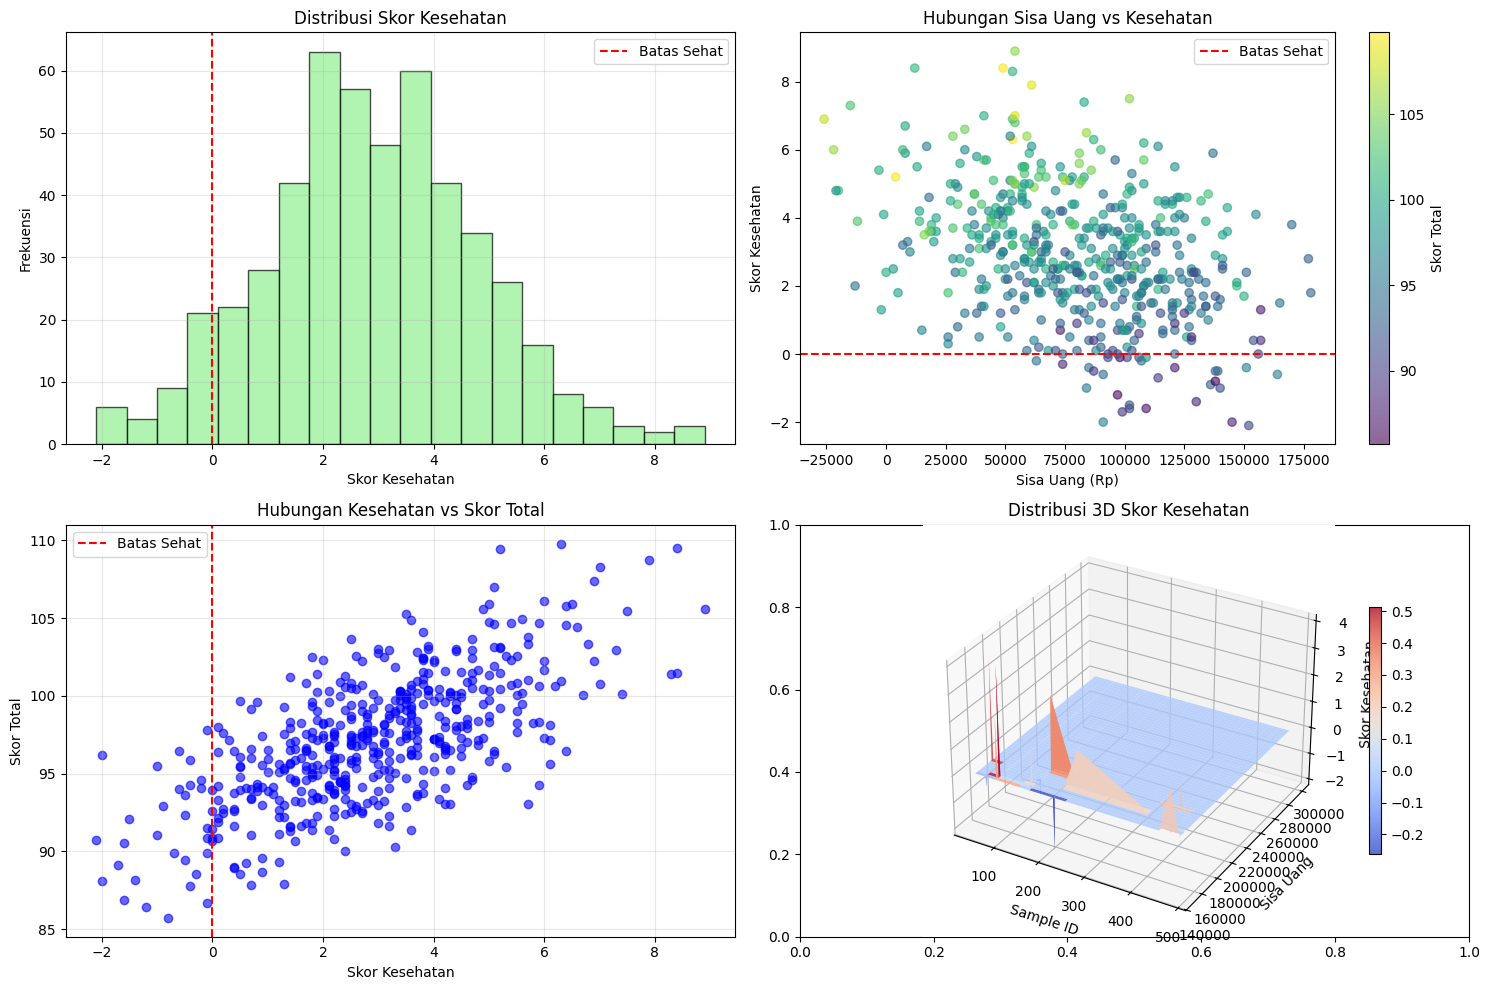


ANALISIS KORELASI:
Korelasi skor kesehatan vs sisa uang: -0.376
Korelasi skor total vs sisa uang: -0.398


In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Distribusi skor kesehatan
axes[0,0].hist(sehat[np.isfinite(sehat)], bins=20, alpha=0.7, color='lightgreen', edgecolor='black') # Filter out NaN values
axes[0,0].axvline(x=0, color='red', linestyle='--', label='Batas Sehat')
axes[0,0].set_xlabel('Skor Kesehatan')
axes[0,0].set_ylabel('Frekuensi')
axes[0,0].set_title('Distribusi Skor Kesehatan')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Hubungan sisa uang vs skor kesehatan
valid_indices = np.isfinite(sisa) & np.isfinite(sehat) & np.isfinite(skor)
scatter = axes[0,1].scatter(sisa[valid_indices], sehat[valid_indices], c=skor[valid_indices], cmap='viridis', alpha=0.6)
axes[0,1].axhline(y=0, color='red', linestyle='--', label='Batas Sehat')
axes[0,1].set_xlabel('Sisa Uang (Rp)')
axes[0,1].set_ylabel('Skor Kesehatan')
axes[0,1].set_title('Hubungan Sisa Uang vs Kesehatan')
axes[0,1].legend()
plt.colorbar(scatter, ax=axes[0,1], label='Skor Total')

# Plot 3: Skor total vs kesehatan
axes[1,0].scatter(sehat[valid_indices], skor[valid_indices], alpha=0.6, color='blue') # Filter out NaN values
axes[1,0].axvline(x=0, color='red', linestyle='--', label='Batas Sehat')
axes[1,0].set_xlabel('Skor Kesehatan')
axes[1,0].set_ylabel('Skor Total')
axes[1,0].set_title('Hubungan Kesehatan vs Skor Total')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: 3D Surface (dipercantik)
ax_3d = fig.add_subplot(224, projection='3d')
''' Menyaring Baris '''
non_zero_rows = np.any(resp_sehat != 0, axis=1)
Y_filtered, X_filtered = np.meshgrid(bin_sisa, sampleid[non_zero_rows])
surf = ax_3d.plot_surface(X_filtered, Y_filtered, resp_sehat[non_zero_rows],
                         cmap='coolwarm', edgecolor='none', alpha=0.8)
ax_3d.set_xlabel('Sample ID')
ax_3d.set_ylabel('Sisa Uang')
ax_3d.set_zlabel('Skor Kesehatan')
ax_3d.set_title('Distribusi 3D Skor Kesehatan')
fig.colorbar(surf, ax=ax_3d, shrink=0.6, aspect=20)

plt.tight_layout()
plt.show()

''' Analisis Korelasi '''
valid_indices_corr = np.isfinite(sehat) & np.isfinite(sisa) & np.isfinite(skor)
if np.sum(valid_indices_corr) > 1:
    print(f"\nANALISIS KORELASI:")
    print(f"Korelasi skor kesehatan vs sisa uang: {np.corrcoef(sehat[valid_indices_corr], sisa[valid_indices_corr])[0,1]:.3f}")
    print(f"Korelasi skor total vs sisa uang: {np.corrcoef(skor[valid_indices_corr], sisa[valid_indices_corr])[0,1]:.3f}")
else:
    print("\nANALISIS KORELASI: Not enough valid data points to calculate correlation.")

> **Visualisasi Hasil dan Analisis Lanjutan**

* **Distribusi Skor Kesehatan:** Mayoritas pola makan di kisaran 2-4. Sebagian besar tingkat kesehatan positif. Batas sehat (Garis Merah) menunjukkan beberapa pola makanan ada yang nilainya negatif. Distribusi normal dengan puncak frekuensi di skor 2-3, dan hanya sebagian kecil pola menghasilkan skor kesehatan sangat tinggi. Dapat disimpulkan bahwa pola makan sehat cukup mudah tercapai dalam banyak kombinasi, tetapi untuk mencapai skor optimal perlu pemilihan makanan tertentu.

* **Hubungan Sisa Uang VS Kesehatan:** Sumbu X (Sisa Uang) menunjukkan seberapa hemat pola makan, sementara sumbu Y (Skor Kesehatan) menunjukkan kualitas kesehatannya. Banyak pola makan sehat masih meninggalkan sisa anggaran yang cukup. Ada juga outlier sisa negatif, namun menghasilkan skor kesehatan tinggi. Sehungga, dapat disimpulkan bahwa pola sehat cenderung **membutuhkan** pengeluaran yang signifikan.

* **Hubungan Kesehatan VS Skor Total:** Pola makan sehat terbukti menjadi faktor kunci untuk mencapai skor total optimal. Meski ada trade-off dengan biaya, pola dengan skor sehat tinggi hampir selalu unggul dalam keseluruhan kualitas dibanding pola yang lebih murah tapi kurang sehat.

* **Distribusi Skor 3D Kesehatan:** Menunjukkan variasi populasi, sebagian besar orang memilih pola "cukup sehat dengan biaya menengah", sementara hanya segelintir yang benar-benar masuk ke kategori sangat sehat.

## **Analisis Frekuensi dan Korelasi**

In [11]:
''' Hitung Makanan yang Paling Sering Dipilih '''
frekuensi_makanan = Counter()
for makanan_idx in resp_pilih[indeks_terbaik]:
    nama_makanan = makan['makanan'][int(makanan_idx)]
    frekuensi_makanan[nama_makanan] += 1

print(f"MAKANAN FAVORIT POLA TERBAIK:")
for makanan, freq in frekuensi_makanan.most_common(5):
    print(f"  {makanan}: {freq} kali")

''' Analisis Korelasi '''
print(f"\nKORELASI:")
print(f"Kesehatan vs Sisa Uang: {np.corrcoef(sehat, sisa)[0,1]:.3f}")
print(f"Skor Total vs Sisa Uang: {np.corrcoef(skor, sisa)[0,1]:.3f}")

MAKANAN FAVORIT POLA TERBAIK:
  Tahu Telur: 7 kali
  capcay: 7 kali
  Soto Betawi: 5 kali
  nasipadang: 5 kali
  cireng: 5 kali

KORELASI:
Kesehatan vs Sisa Uang: -0.376
Skor Total vs Sisa Uang: -0.398


> Dari perhitungan frekuensi, terlihat bahwa makanan yang paling sering muncul dalam pola terbaik adalah Tahu Telur dan Capcay (masing-masing 7 kali). Kedua menu ini bisa dianggap sebagai “favorit” karena cukup sering dipilih, kemungkinan karena kombinasi antara harga yang relatif terjangkau dan nilai kesehatan yang masih baik.

> Sementara itu, analisis korelasi memberikan gambaran hubungan antarvariabel:
* **Kesehatan vs Sisa Uang = -0.376** → Semakin tinggi skor kesehatan pola makan, cenderung semakin sedikit sisa uang yang dimiliki. Dengan kata lain, makanan sehat relatif membutuhkan biaya lebih besar.
* **Skor Total vs Sisa Uang = -0.398** → Tren serupa juga terjadi ketika skor total (gabungan kenyang, rasa, sehat, dan bosan) meningkat; sisa uang akan menurun. Ini mengindikasikan bahwa kualitas pola makan yang lebih baik memang menuntut pengeluaran lebih tinggi.